<a href="https://colab.research.google.com/github/VijayaBhargavi198/5731Assignments/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1: Topic Modeling**
 This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, select two models and write a python program to identify the top 20 topics (with 15 words for each topic) in the dataset. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.
 The following information should be reported:

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster.

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis

In [156]:
  from zipfile import ZipFile 
file_name = '/content/Assignment four data Yelp (question 1 and 2).zip'
with ZipFile(file_name, 'r') as zip:  
    # extracting all the files 
    zip.extractall() 
    print('Extraction of files complete!')

Extraction of files complete!


In [157]:
import os,json
import pandas as pd
arr = os.listdir('/content/Assignment four data Yelp (question 1 and 2)')
reviews = []
ratings = []
for file in arr:
  with open('/content/Assignment four data Yelp (question 1 and 2)/'+file,encoding = "utf-8") as i:
    data = json.load(i)
    for j in data:
      reviews.append(j['text'])
      ratings.append(j['stars']) 
input_df = pd.DataFrame(reviews, columns=["review"])
input_df["ratings"]=ratings
input_df.head()

,review,ratings
0,Exceptional customer service by your service d...,5.0
1,I decided to check out downtown Pittsburgh on ...,3.0
2,Just got back home form here and couldn't wait...,5.0
3,Came here for lunch with a friend last Saturda...,5.0
4,Good food but terrible service. have been her...,2.0


In [158]:
# Preprocessing data to be used in text modelling
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import pandas as pd
from textblob import Word
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
# cleaning the text data
input_df['cleaned text review'] = input_df['review'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned text review'] = input_df['cleaned text review'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned text review'] = input_df['cleaned text review'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df['cleaned text review'] = input_df['cleaned text review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
input_df.head() # dataframe column that would be used for further process

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,ratings,cleaned text review
0,Exceptional customer service by your service d...,5.0,exceptional customer service service departmen...
1,I decided to check out downtown Pittsburgh on ...,3.0,decided check downtown pittsburgh trip family ...
2,Just got back home form here and couldn't wait...,5.0,got back home form wait yelp place came group ...
3,Came here for lunch with a friend last Saturda...,5.0,came lunch friend last saturday waitress promp...
4,Good food but terrible service. have been her...,2.0,good food terrible service twice times disappo...


In [ ]:
# Biterm Topic Model (BTM)
! pip install biterm
! pip install pyLDAvis 

In [160]:
import numpy as np
import pyLDAvis
from biterm.btm import oBTM 
from sklearn.feature_extraction.text import CountVectorizer
from biterm.utility import vec_to_biterms, topic_summuary # helper functions
# vectorize texts
texts = input_df['cleaned text review'].head(1000).values
vec = CountVectorizer(stop_words='english')
X = vec.fit_transform(texts).toarray()
vocab = np.array(vec.get_feature_names())
biterms = vec_to_biterms(X)
btm = oBTM(num_topics=20, V=vocab)
print("Train Online BTM:")
topics = btm.fit_transform(biterms, iterations=5)

Train Online BTM:


100%|██████████| 5/5 [50:15<00:00, 603.19s/it]
/usr/local/lib/python3.6/dist-packages/biterm/btm.py:76: RuntimeWarning: invalid value encountered in true_divide
  P_zd[i] = P_zb.sum(axis=0) / P_zb.sum(axis=0).sum()


In [176]:
# print coherence
print("\n Topic coherence ")
topic_summuary(btm.phi_wz.T, X, vocab, 10)


 Topic coherence 
Topic 0 | Coherence=-67.70 | Top words= like food going time service place good really customer ordered
Topic 1 | Coherence=-65.00 | Top words= time good really place great like food way came staff
Topic 2 | Coherence=-63.06 | Top words= time place like food good great bad got came service
Topic 3 | Coherence=-58.65 | Top words= good food like time great place nice really got service
Topic 4 | Coherence=-63.14 | Top words= place good food like time great came pretty got really
Topic 5 | Coherence=-90.25 | Top words= vegas hotel las tv flamingo son dia la mini tan
Topic 6 | Coherence=-61.94 | Top words= good food time great place like service went got really
Topic 7 | Coherence=-62.34 | Top words= good food place service like ordered time great really delicious
Topic 8 | Coherence=-56.75 | Top words= place like good great people come service food time really
Topic 9 | Coherence=-61.30 | Top words= good food like service place great time little really nice
Topic 10 | C

{'coherence': [-67.70243884031565,
  -64.99908109510439,
  -63.063960802648324,
  -58.64899550538217,
  -63.138770449799765,
  -90.24642971546308,
  -61.944976399082464,
  -62.34027522030351,
  -56.74511266995867,
  -61.29602984449154,
  -60.07204257316047,
  -81.96144784187123,
  -62.4920912819262,
  -74.74856623718206,
  -59.77183793673288,
  -62.15132281504396,
  -61.98380380408424,
  -61.24693398569384,
  -71.94373824394997,
  -64.85235336343179],
 'top_words': [array(['like', 'food', 'going', 'time', 'service', 'place', 'good',
         'really', 'customer', 'ordered'], dtype='<U21'),
  array(['time', 'good', 'really', 'place', 'great', 'like', 'food', 'way',
         'came', 'staff'], dtype='<U21'),
  array(['time', 'place', 'like', 'food', 'good', 'great', 'bad', 'got',
         'came', 'service'], dtype='<U21'),
  array(['good', 'food', 'like', 'time', 'great', 'place', 'nice', 'really',
         'got', 'service'], dtype='<U21'),
  array(['place', 'good', 'food', 'like', 'time'

In [177]:
 #reviews related to each topic
print("\n\n text and related topics are as follows"'\n')
for i in range(len(texts)):
  print("{} (topic: {})".format(texts[i], topics[i].argmax()))



 text and related topics are as follows

exceptional customer service service department advisor ray courteous efficient knowledgeable lounge comfortable well stocked refreshments (topic: 18)
decided check downtown pittsburgh trip family visit recently took walk around area location caught eye outdoor seating right outside pnc park decided pot roast nachos appetizer pretty good nice chunks pot roast various cheeses decided atria combo andouille sausage perogies chicken sauerkraut figured would something different sausage great perogies care chicken much dark meat bread crumbs prefer white meat probably reason also tasted friends steak hoagie area better little dry enough cheese onions outdoors ambiance great pittsburgh great downtown nothing like detroit alive various things beautiful city overall restaurant good experience waiter great funny also also talked people sitting beside us made good time however would opt another place visit (topic: 16)
got back home form wait yelp place c

In [ ]:
'''
Summary of all the topis so, we have in this model
topic1: 'like', 'food', 'going', 'time', 'service', 'place', 'good',
         'really', 'customer', 'ordered'
description:a food review that speaks positive about the place and says the food is good
topic2: 'time', 'good', 'really', 'place', 'great', 'like', 'food', 'way',
         'came', 'staff'
description: a restaurant review, gives positive review about food and the way staff was
topic3:'time', 'place', 'like', 'food', 'good', 'great', 'bad', 'got',
         'came', 'service'
description: This has both good and bad review, talks about food being good but service not being that good
Topic4:'good', 'food', 'like', 'time', 'great', 'place', 'nice', 'really',
         'got', 'service'
description: also a restarant reviews, talks positive about the place
Topic5: 'place', 'good', 'food', 'like', 'time', 'great', 'came', 'pretty',
         'got', 'really'
description: food reviews that says positive things about food
Topic6: 'vegas', 'hotel', 'las', 'tv', 'flamingo', 'son', 'dia', 'la',
         'mini', 'tan'
description: This review seems like that of a hotel talks about amenities available at the hotel
Topic7: 'good', 'food', 'time', 'great', 'place', 'like', 'service',
         'went', 'got', 'really'
description: food place review, where customer to the place he went for both food and customer service
Topic8: 'good', 'food', 'place', 'service', 'like', 'ordered', 'time',
         'great', 'really', 'delicious'
description: food reviews says food id delicious and service was good too and ordere was given on time
Topic9: 'place', 'like', 'good', 'great', 'people', 'come', 'service',
         'food', 'time', 'really'
description:food review says people come here for good food and also service is good
Topic10: 'good', 'food', 'like', 'service', 'place', 'great', 'time',
         'little', 'really', 'nice'
description good food and likes the service, its a really nice place
Topic11: 'time', 'good', 'great', 'place', 'like', 'food', 'really',
         'service', 'nice', 'came'
description:food reviews that says positive things about food
Topic12: 'service', 'pour', 'la', 'super', 'place', 'good', 'food', 'pas',
         'le', 'like'
descriptionfood review calls it a super place which serves good food
Topic13: 'place', 'like', 'good', 'food', 'time', 'great', 'service',
         'little', 'people', 'really'
description:food reviews that says positive things about food
Topic14: 'place', 'great', 'good', 'food', 'like', 'day', 'time', 'nice',
         'come', 'recommend'
description: Great place for good food during day time and customers remmonds to come and try
Topic15: 'place', 'really', 'food', 'good', 'like', 'time', 'know',
         'service', 'great', 'came'
description: food reviews that says positive things about food
Topic16: 'food', 'like', 'good', 'place', 'time', 'great', 'service',
         'really', 'order', 'got'
description:food reviews that says positive things about food and got order in time 
Topic17: 'place', 'good', 'food', 'like', 'great', 'time', 'service',
         'really', 'nice', 'came'
description: food reviews that says positive things about food
Topic18: 'good', 'place', 'like', 'food', 'great', 'really', 'try', 'time',
         'service', 'make'
description:food review, says food is good and suggests one should really try 
Topic19: 'food', 'good', 'like', 'place', 'time', 'service', 'say', 'great',
         'got', 'told'
description: talks positive about food and service
Topic20:'good', 'place', 'food', 'like', 'time', 'great', 'service',
         'little', 'try', 'definitely'
description: good food place and one should definitely try it 
'''

In [180]:
#HMM topic modelling
#cloned the git code which is in git
! git clone https://github.com/dongwookim-ml/python-topic-model.git

Cloning into 'python-topic-model'...
remote: Enumerating objects: 357, done.
remote: Total 357 (delta 0), reused 0 (delta 0), pack-reused 357
Receiving objects: 100% (357/357), 18.75 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (181/181), done.


In [97]:
import ptm
from ptm.ptm import hmm_lda
os.listdir()

['.config',
 'test.csv',
 'sample_data',
 'logs',
 'Assignment four data Yelp (question 1 and 2)',
 '.ipynb_checkpoints',
 'Assignment four data Yelp (question 1 and 2).zip',
 'ptm',
 'train.csv']

In [63]:
os.listdir('ptm')

['LICENSE',
 '.gitignore',
 'data',
 '.git',
 'setup.py',
 'ptm',
 'notebook',
 'README.md']

In [76]:
input_df['cleaned text review']

0         exceptional customer service service departmen...
1         decided check downtown pittsburgh trip family ...
2         got back home form wait yelp place came group ...
3         came lunch friend last saturday waitress promp...
4         good food terrible service twice times disappo...
                                ...                        
499995    bonne bouffe service courtois prix très résona...
499996    great place get lunch time pho fix ordered chi...
499997    foot massage better could even imagine best li...
499998    went brunch experience sadly disappointing foo...
499999    underwhelmed rico drive past multiple times si...
Name: cleaned text review, Length: 500000, dtype: object

In [98]:
topics = 20
number_of_classes = 20
from ptm.ptm.nltk_corpus import get_ids_cnt
from ptm.ptm.utils import convert_cnt_to_list
model2 = hmm_lda.HMM_LDA(n_docs=10, n_voca=15000, n_topic = topics, n_class= number_of_classes, alpha=0.1, beta=0.01, gamma=0.1, eta=0.1, verbose=False)


In [128]:
data = input_df['cleaned text review'].head(1000).values

vocabulary, id2words, count_of_words = get_ids_cnt(data)
corpus.append(convert_cnt_to_list(id2words, count_of_words))
try:
  model2.fit(corpus,max_iter=5)
except:
  pass

['time' 'service' 'would' ... 'test' 'happily' 'gift']


In [129]:
print("The topics are:\n\n")
from ptm.ptm.utils import get_top_words
for index in range(20):
  top_words = get_top_words(model2.TW, vocab=vocabulary,topic=index, n_words=10)
  print(top_words)

The topics are:


['try' 'get' 'bad' 'restaurant' 'take' 'work' 'much' 'however' 'amazing'
 'first']
['time' 'service' 'vegetarian' 'really' 'chicken' 'made' 'every' 'crispy'
 'amazing' 'appointment']
['service' 'would' 'get' 'found' 'could' 'ever' 'people' 'even' 'feeling'
 'nights']
['service' 'better' 'experience' 'went' 'side' 'first' 'even' 'atmosphere'
 'far' 'sweet']
['another' 'like' 'shrimp' 'go' 'husband' 'white' 'order' 'either' 'party'
 'fantastic']
['see' 'actually' 'also' 'back' 'though' 'delicious' 'better' 'menu'
 'little' 'culture']
['would' 'people' 'us' 'ever' 'expect' 'date' 'night' 'price' 'west'
 'delicious']
['time' 'us' 'believe' 'think' 'everything' 'choice' 'another' 'would'
 'service' 'could']
['time' 'sure' 'could' 'like' 'ever' 'around' 'much' 'made' 'especially'
 'clothes']
['like' 'service' 'make' 'attentive' 'back' 'time' 'sauce' 'first' 'well'
 'table']
['like' 'location' 'back' 'even' 'top' 'variety' 'beat' 'difficult'
 'someone' 'later']
['back' 'menu

In [67]:
'''
Topic descriptions for HMM LDA
topic1: ['try' 'get' 'bad' 'restaurant' 'take' 'work' 'much' 'however' 'amazing' 'first']
description: restaurant review , a negative one saying tried because food used to be good her but now its bad
topic2: ['time' 'service' 'vegetarian' 'really' 'chicken' 'made' 'every' 'crispy' 'amazing' 'appointment']
description:timely service, vegetarian is also available, chicken was crispy and amazing here
topic3: ['service' 'would' 'get' 'found' 'could' 'ever' 'people' 'even' 'feeling' 'nights']
description: found this place that services even at nights
topic4: ['service' 'better' 'experience' 'went' 'side' 'first' 'even' 'atmosphere' 'far' 'sweet']
description: customer had a good service and atmosphere was sweet too
topic5: ['another' 'like' 'shrimp' 'go' 'husband' 'white' 'order' 'either' 'party' 'fantastic']
description: like shrimp here , customer asked her husband to make another order
topic6: ['see' 'actually' 'also' 'back' 'though' 'delicious' 'better' 'menu' 'little' 'culture']
description: food review that has both positive and negative things about restaurant
topic7: ['would' 'people' 'us' 'ever' 'expect' 'date' 'night' 'price' 'west' 'delicious']
description: went to this place on a date night price was very reasonable never expected and food is delicious
topic8: ['time' 'us' 'believe' 'think' 'everything' 'choice' 'another' 'would' 'service' 'could']
description: a negative review, asks to think and make another review
topic9: ['time' 'sure' 'could' 'like' 'ever' 'around' 'much' 'made' 'especially' 'clothes']
description: clothes review
topic10: ['like' 'service' 'make' 'attentive' 'back' 'time' 'sauce' 'first' 'well' 'table']
description restaurant review talks about good service,  sauces
topic11: ['like' 'location' 'back' 'even' 'top' 'variety' 'beat' 'difficult' 'someone' 'later']
description: its a place review
topic12: ['back' 'menu' 'ordered' 'time' 'give' 'enjoy' 'along' 'dark' 'lotion' 'right']
description:restaurant review, talks about menu and having a good time and enjoying 
topic13: ['service' 'server' 'get' 'like' 'menu' 'really' 'mart' 'throughout' 'never' 'bag']
description: talks about sevice and servers
topic14: ['time' 'come' 'would' 'feel' 'definitely' 'also' 'well' 'store' 'actually' 'area']
description: talks about time and area may be some place
topic15: ['would' 'really' 'nice' 'see' 'made' 'meal' 'times' 'people' 'however' 'high']
description:nicely made meal and would really come back more times
topic16: ['service' 'gave' 'used' 'old' 'sub' 'vip' 'tried' 'set' 'expensive' 'sell']
description: about some object that was old and was an expensive sell
topic17: ['would' 'get' 'time' 'chocolate' 'next' 'well' 'saturday' 'wine' 'member' 'although']
description: if i would get time next saturday would get chocolates and wine 
topic18: ['back' 'get' 'sweet' 'nice' 'love' 'think' 'small' 'would' 'also' 'fish']
description: may be review for a place , says positive things
topic19: ['love' 'party' 'us' 'try' 'meat' 'could' 'told' 'last' 'downtown' 'went']
description:talks about downtown, may be a place where they went to a party and loved meat 
topic20: ['time' 'would' 'choice' 'first' 'also' 'back' 'come' 'small' 'well' 'large']
description: has all the words related to sizes 

'''


# **Question 2: Yelp Review Sentiment Analysis**
 Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: 80% data for training and 20% data for testing.
 Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.|

In [ ]:
def sentiment(x):
    if x == 5:
        return 'Very positive'
    if x == 4:
        return 'Positive'
    if x == 3:
        return 'Neutral'
    if x == 2:
        return 'Negative'
    if x == 1:
        return 'Very negative'
    
input_df['sentiment'] = input_df['ratings'].apply(lambda x: sentiment(x))
input_df.head(5)

,review,ratings,cleaned text review,sentiment
0,"Awesome service and fantastic food, the wait s...",5.0,awesome service fantastic food wait staff frie...,Very positive
1,Seemed pretty pricey to me for what you got......,2.0,seemed pretty pricey got burgers tasted pretty...,Negative
2,We TRIED to go to the buffet on Tuesday eve fo...,1.0,tried go buffet tuesday eve dinner found close...,Very negative
3,Came here for lunch on my 20th birthday and th...,5.0,came lunch th birthday gave us free dessert si...,Very positive
4,"Amazing treats - I love their cinnamon roll, c...",5.0,amazing treats love cinnamon roll cupcakes ice...,Very positive


In [ ]:
# TFIDF-based SVM 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
train, test = sklearn.model_selection.train_test_split(input_df, train_size=0.8, test_size=0.2)
svm_pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SGDClassifier( max_iter=100,learning_rate='optimal'))])
svm = svm_pipeline.fit(train['cleaned text review'], train['sentiment'])
test['SVM_predicted sentiment'] = svm.predict(test['cleaned text review'])
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
print("Results for first supervised learning algorithm, SVM: "'\n')
print(test[['review', 'sentiment', 'SVM_predicted sentiment']].head(5))
svm_accuracy = accuracy_score(test['sentiment'], test['SVM_predicted sentiment'])*100
svm_precision = precision_score(test['sentiment'], test['SVM_predicted sentiment'], average='macro')
svm_recall = recall_score(test['sentiment'], test['SVM_predicted sentiment'], average='macro')
svm_f1 = f1_score(test['sentiment'], test['SVM_predicted sentiment'], average='macro')

print('\n', 'The accuracy of the TFIDF-based SVM sentiment identification is:', svm_accuracy)
print('The precision score of the TFIDF-based SVM sentiment identification is:', svm_precision)
print('The recall score of the TFIDF-based SVM sentiment identification is:', svm_recall)
print('The f1-score of the TFIDF-based SVM sentiment identification is:', svm_f1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Results for first supervised learning algorithm, SVM: 

                                                   review  ... SVM_predicted sentiment
218848  I am a fan of Beer Express because of their se...  ...           Very positive
398884  I've given this place numerous tries because t...  ...           Very negative
313014  This Place is the best!\n\nHigh quality meats....  ...           Very positive
145799  Went to Euro nails on Friday after my sister f...  ...           Very positive
196443  We came here last night for a late supper and ...  ...                Positive

[5 rows x 3 columns]

 The accuracy of the TFIDF-based SVM sentiment identification is: 61.925
The precision score of the TFIDF-based SVM sentiment identification is: 0.5331333804040859
The recall score of the TFIDF-based SVM sentiment identification is: 0.4606307465296361
The f1-score of the TFIDF-based SVM sentiment identification is: 0.4382381269146757


In [ ]:
# TFIDF-based Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
nb = nb_pipeline.fit(train['cleaned text review'], train['sentiment'])
test['NB_predicted sentiment'] = nb.predict(test['cleaned text review'])
print("Results for second supervised learning algorithm,Naive Bayes :", '\n')
print(test[['review', 'sentiment', 'NB_predicted sentiment']].head(5))
NB_accuracy = accuracy_score(test['sentiment'], test['NB_predicted sentiment'])*100
NB_f1 = f1_score(test['sentiment'], test['NB_predicted sentiment'], average='macro')
NB_precision = precision_score(test['sentiment'], test['NB_predicted sentiment'], average='macro')
NB_recall = recall_score(test['sentiment'], test['NB_predicted sentiment'], average='macro')

print('The accuracy of the TFIDF-based Naive Bayes sentiment identification is:', NB_accuracy)
print('The precision score of the TFIDF-based Naive Bayes sentiment identification is:', NB_precision)
print('The recall score of the TFIDF-based Naive Bayes sentiment identification is:', NB_recall)
print('The f1-score of the TFIDF-based Naive Bayes sentiment identification is:', NB_f1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Results for second supervised learning algorithm,Naive Bayes : 

                                                   review  ... NB_predicted sentiment
218848  I am a fan of Beer Express because of their se...  ...          Very positive
398884  I've given this place numerous tries because t...  ...          Very positive
313014  This Place is the best!\n\nHigh quality meats....  ...          Very positive
145799  Went to Euro nails on Friday after my sister f...  ...          Very positive
196443  We came here last night for a late supper and ...  ...          Very positive

[5 rows x 3 columns]
The accuracy of the TFIDF-based Naive Bayes sentiment identification is: 56.774
The precision score of the TFIDF-based Naive Bayes sentiment identification is: 0.46440150565373395
The recall score of the TFIDF-based Naive Bayes sentiment identification is: 0.37244025511316664
The f1-score of the TFIDF-based Naive Bayes sentiment identification is: 0.3425739130327179


I considered TFIDF based, we generally use TF-IDF to reflect how relevant a term is in a given document. The intuition behind it is that if a word occurs multiple times, its relevance should be boosted.
I selected SVM and naives bayes algorithm.
Upon comparision of the two algorithms, I found that for my dataset with the present algorithms used, SVM proves to perform well compared to the naives bayes algorithm

# **Question 3: House price prediction**
(40 points). You are required to build a regression model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0.

In [131]:
import pandas as pd
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")
df = pd.concat([df_train, df_test], axis=0)
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [132]:
#to find the missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [133]:
#to get the deatils of all the quantitative variables
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


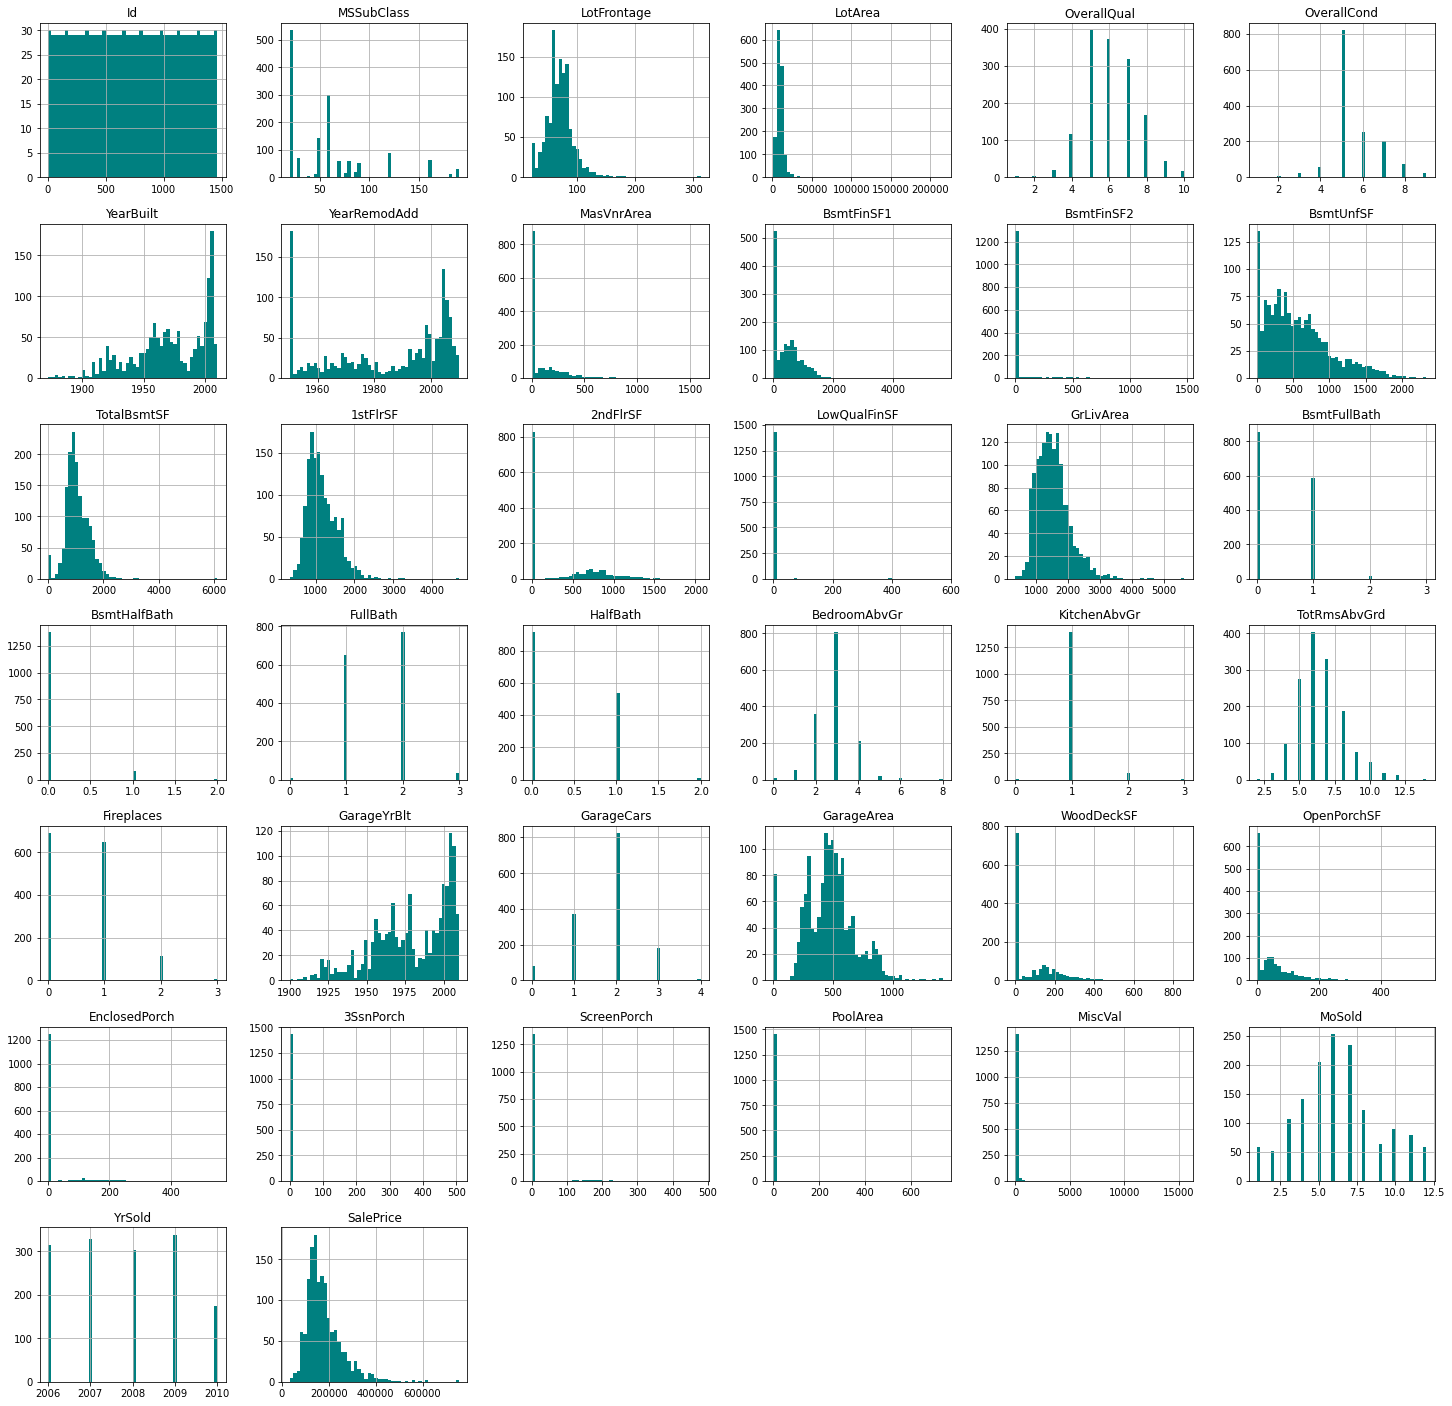

The Correlation Values are:
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAb

In [140]:
#trying to find correlation
import matplotlib.pyplot as plt
%matplotlib inline
df_train.hist(bins=50, figsize=(25,25),color="teal")
plt.show()
correlation_matrix = df_train.corr()
print('The Correlation Values are:\n', correlation_matrix["SalePrice"].sort_values(ascending=False))

In [14]:
# PREPROCESSING AND UNDERSTANDING DATA
# Numerical values/ quantitative variables of the dataset are: MSSubClass, LotFrontage, LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, stFlrSF, 2ndFlrSF, LowQualFinSF,
# GrLivArea,GarageYrBlt, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, 'PoolArea', 'MiscVal', 'BsmtFullBath',BsmtHalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, OverallQual, 
#OverallCond, GarageCars, Fireplaces, FullBath, HalfBath,yrsold

#categorial or qualitative variables are:SaleCondition,Neighborhood,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageFinish,MiscFeature,KitchenQual,LandContour,Exterior1st,Exterior2nd,FireplaceQu,GarageQual,GarageCond,
#PavedDrive,GarageType,Functional,Foundation,MasVnrType,Condition1,Condition2,HouseStyle,CentralAir,Electrical,Utilities,LotConfig,LandSlope,RoofStyle,ExterQual,ExterCond,HeatingQC,MSZoning,LotShape,BldgType,RoofMatl,BsmtQual
#BsmtCond,SaleType,Heating,Street,PoolQC,MoSold,YrSold,Fence,Alley

# To handle Null values in numerical variables, we replace values with 0, mean, mode
df[["GarageYrBlt","GarageCars","GarageArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","BsmtFullBath","BsmtHalfBath","TotalBsmtSF",
    "MasVnrArea"]]=df[["GarageYrBlt","GarageCars","GarageArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","BsmtFullBath","BsmtHalfBath","TotalBsmtSF",
    "MasVnrArea"]].fillna(0)
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['LotFrontage']=df['LotFrontage'].fillna((round(df['LotFrontage'].mean())))

# To handle Null values in qualitative variables, we replace them with none
df[["GarageType","GarageFinish","GarageCond","GarageQual","Alley","BsmtQual","BsmtCond","FireplaceQu","BsmtExposure","BsmtFinType1","Fence","BsmtFinType2",
      "MasVnrType","PoolQC","MiscFeature"]]=df[["GarageType","GarageFinish","GarageCond","GarageQual","Alley","BsmtQual","BsmtCond","FireplaceQu","BsmtExposure","BsmtFinType1","Fence","BsmtFinType2",
      "MasVnrType","PoolQC","MiscFeature"]].fillna("None")
#df


In [15]:
# We cant perform regression with categorical variable, thus we perform one hot encoding
# One-hot encoding transforms categorical features to a format that works better with classification and regression algorithms. It's very useful in methods where multiple types of data representation is necessary.
val1 = pd.get_dummies(df.SaleCondition)
df = pd.concat([df, val1], axis=1)
df.drop('SaleCondition', inplace=True, axis=1)
val2 = pd.get_dummies(df.Neighborhood)
df = pd.concat([df, val2], axis=1)
df.drop('Neighborhood', inplace=True, axis=1)
val3 = pd.get_dummies(df.BsmtExposure)
df = pd.concat([df, val3], axis=1)
df.drop('BsmtExposure', inplace=True, axis=1)
val4 = pd.get_dummies(df.BsmtFinType1)
df = pd.concat([df, val4], axis=1)
df.drop('BsmtFinType1', inplace=True, axis=1)
val5 = pd.get_dummies(df.BsmtFinType2)
df = pd.concat([df, val5], axis=1)
df.drop('BsmtFinType2', inplace=True, axis=1)
val6 = pd.get_dummies(df.GarageFinish)
df = pd.concat([df, val6], axis=1)
df.drop('GarageFinish', inplace=True, axis=1)
val7 = pd.get_dummies(df.MiscFeature)
df = pd.concat([df, val7], axis=1)
df.drop('MiscFeature', inplace=True, axis=1)
val8 = pd.get_dummies(df.KitchenQual)
df = pd.concat([df, val8], axis=1)
df.drop('KitchenQual', inplace=True, axis=1)
val9 = pd.get_dummies(df.LandContour)
df = pd.concat([df, val9], axis=1)
df.drop('LandContour', inplace=True, axis=1)
val10 = pd.get_dummies(df.Exterior1st)
df = pd.concat([df, val10], axis=1)
df.drop('Exterior1st', inplace=True, axis=1)
val11 = pd.get_dummies(df.Exterior2nd)
df = pd.concat([df, val11], axis=1)
df.drop('Exterior2nd', inplace=True, axis=1)
val12 = pd.get_dummies(df.FireplaceQu)
df = pd.concat([df, val12], axis=1)
df.drop('FireplaceQu', inplace=True, axis=1)
val13 = pd.get_dummies(df.GarageQual)
df = pd.concat([df, val13], axis=1)
df.drop('GarageQual', inplace=True, axis=1)
val14 = pd.get_dummies(df.GarageCond)
df = pd.concat([df, val14], axis=1)
df.drop('GarageCond', inplace=True, axis=1)
val15 = pd.get_dummies(df.PavedDrive)
df = pd.concat([df, val15], axis=1)
df.drop('PavedDrive', inplace=True, axis=1)
val16 = pd.get_dummies(df.GarageType)
df = pd.concat([df, val16], axis=1)
df.drop('GarageType', inplace=True, axis=1)
val17 = pd.get_dummies(df.Functional)
df = pd.concat([df, val17], axis=1)
df.drop('Functional', inplace=True, axis=1)
val18 = pd.get_dummies(df.Foundation)
df = pd.concat([df, val18], axis=1)
df.drop('Foundation', inplace=True, axis=1)
val19 = pd.get_dummies(df.MasVnrType)
df = pd.concat([df, val19], axis=1)
df.drop('MasVnrType', inplace=True, axis=1)
val20 = pd.get_dummies(df.Condition1)
df = pd.concat([df, val20], axis=1)
df.drop('Condition1', inplace=True, axis=1)
val21 = pd.get_dummies(df.Condition2)
df = pd.concat([df, val21], axis=1)
df.drop('Condition2', inplace=True, axis=1)
val22 = pd.get_dummies(df.HouseStyle)
df = pd.concat([df, val22], axis=1)
df.drop('HouseStyle', inplace=True, axis=1)
val23 = pd.get_dummies(df.CentralAir)
df = pd.concat([df, val23], axis=1)
df.drop('CentralAir', inplace=True, axis=1)
val24 = pd.get_dummies(df.Electrical)
df = pd.concat([df, val24], axis=1)
df.drop('Electrical', inplace=True, axis=1)
val25 = pd.get_dummies(df.Utilities)
df = pd.concat([df, val25], axis=1)
df.drop('Utilities', inplace=True, axis=1)
val26 = pd.get_dummies(df.LotConfig)
df = pd.concat([df, val26], axis=1)
df.drop('LotConfig', inplace=True, axis=1)
val27 = pd.get_dummies(df.LandSlope)
df = pd.concat([df, val27], axis=1)
df.drop('LandSlope', inplace=True, axis=1)
val28 = pd.get_dummies(df.RoofStyle)
df = pd.concat([df, val28], axis=1)
df.drop('RoofStyle', inplace=True, axis=1)
val29 = pd.get_dummies(df.ExterQual)
df = pd.concat([df, val29], axis=1)
df.drop('ExterQual', inplace=True, axis=1)
val30 = pd.get_dummies(df.ExterCond)
df = pd.concat([df, val30], axis=1)
df.drop('ExterCond', inplace=True, axis=1)
val31 = pd.get_dummies(df.HeatingQC)
df = pd.concat([df, val31], axis=1)
df.drop('HeatingQC', inplace=True, axis=1)
val32 = pd.get_dummies(df.MSZoning)
df = pd.concat([df, val32], axis=1)
df.drop('MSZoning', inplace=True, axis=1)
val33 = pd.get_dummies(df.LotShape)
df = pd.concat([df, val33], axis=1)
df.drop('LotShape', inplace=True, axis=1)
val34 = pd.get_dummies(df.BldgType)
df = pd.concat([df, val34], axis=1)
df.drop('BldgType', inplace=True, axis=1)
val35 = pd.get_dummies(df.RoofMatl)
df = pd.concat([df, val35], axis=1)
df.drop('RoofMatl', inplace=True, axis=1)
val36 = pd.get_dummies(df.BsmtQual)
df = pd.concat([df, val36], axis=1)
df.drop('BsmtQual', inplace=True, axis=1)
val37 = pd.get_dummies(df.BsmtCond)
df = pd.concat([df, val37], axis=1)
df.drop('BsmtCond', inplace=True, axis=1)
val38 = pd.get_dummies(df.SaleType)
df = pd.concat([df, val38], axis=1)
df.drop('SaleType', inplace=True, axis=1)
val39 = pd.get_dummies(df.Heating)
df = pd.concat([df, val39], axis=1)
df.drop('Heating', inplace=True, axis=1)
val40 = pd.get_dummies(df.Street)
df = pd.concat([df, val40], axis=1)
df.drop('Street', inplace=True, axis=1)
val41 = pd.get_dummies(df.PoolQC)
df = pd.concat([df, val41], axis=1)
df.drop('PoolQC', inplace=True, axis=1)
val42 = pd.get_dummies(df.MoSold)
df = pd.concat([df, val42], axis=1)
df.drop('MoSold', inplace=True, axis=1)
val43 = pd.get_dummies(df.YrSold)
df = pd.concat([df, val43], axis=1)
df.drop('YrSold', inplace=True, axis=1)
val44 = pd.get_dummies(df.Fence)
df = pd.concat([df, val44], axis=1)
df.drop('Fence', inplace=True, axis=1)
val45 = pd.get_dummies(df.Alley)
df = pd.concat([df, val45], axis=1)
df.drop('Alley', inplace=True, axis=1)


In [16]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = df.fillna(0)
train, test = sklearn.model_selection.train_test_split(df, test_size=0.5)
X=train.drop(['Id','SalePrice'],axis=1)
Y=train['SalePrice']
test=test.drop(['Id','SalePrice'],axis=1)

In [17]:
regression=LinearRegression()
regression.fit(X,Y)
test['Pred SalePrice'] = regression.predict(test)

In [19]:
test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Abnorml,AdjLand,Alloca,Family,Normal,Partial,...,Oth,WD,Floor,GasA,GasW,Grav,OthW,Wall,Grvl,Pave,Ex,Fa,Gd,None,1,2,3,4,5,6,7,8,9,10,11,12,2006,2007,2008,2009,2010,GdPrv,GdWo,MnPrv,MnWw,None,Grvl,None,Pave,Pred SalePrice
848,50,75.0,45600,6,8,1908,1997,0.0,0.0,0.0,907.0,907.0,1307,1051,0,2358,0.0,0.0,3,0,5,1,10,1,1908.0,2.0,360.0,486,40,0,0,175,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,108809.695308
154,160,21.0,1476,4,7,1970,1970,0.0,176.0,0.0,370.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,200,26,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,29944.450506
1300,80,83.0,10184,6,5,1963,1963,379.0,580.0,0.0,503.0,1083.0,1146,0,0,1146,0.0,1.0,1,0,3,1,6,1,1963.0,1.0,294.0,345,75,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,32572.333836
1082,20,70.0,8749,7,5,2002,2002,100.0,0.0,0.0,1459.0,1459.0,1459,0,0,1459,0.0,0.0,2,0,3,1,6,1,2002.0,2.0,527.0,192,39,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,104757.872719
1084,50,74.0,16287,5,6,1925,1950,0.0,130.0,105.0,666.0,901.0,901,450,0,1351,1.0,0.0,1,0,3,1,7,1,1975.0,2.0,576.0,0,0,43,0,100,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,63018.835834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,50,69.0,13837,7,5,1988,1988,178.0,1002.0,202.0,0.0,1204.0,1377,806,0,2183,0.0,0.0,2,1,4,1,9,0,1988.0,3.0,786.0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,108877.325506
142,50,71.0,8520,5,4,1952,1952,0.0,507.0,0.0,403.0,910.0,910,475,0,1385,0.0,0.0,2,0,4,1,6,0,2000.0,2.0,720.0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,14769.731592
1191,160,24.0,2645,8,5,1999,2000,456.0,0.0,0.0,776.0,776.0,764,677,0,1441,0.0,0.0,2,1,2,1,5,0,1999.0,2.0,492.0,206,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,68825.531235
709,20,69.0,7162,5,7,1966,1966,41.0,0.0,0.0,876.0,876.0,904,0,0,904,0.0,0.0,1,0,3,1,6,0,1966.0,1.0,408.0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,62899.500154
